In [1]:
import pandas as pd
import numpy as np
import os
import requests

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
# Downloads the updated csv for the 2023 season
import gdown

def update_df():
    '''
    Download most recent csv file, concat with rest of data, return the full df
    '''
    output = "lol_2023.csv" #What to save the downloaded file as
    id = "1XXk2LO0CsNADBB1LRGOV5rUpyZdEZ8s2" #The id from the google drive file
    gdown.download(id=id, output=output, quiet=False)
    
    df_2021 = pd.read_csv('lol_2021.csv')
    df_2022 = pd.read_csv('lol_2022.csv')
    df_2023 = pd.read_csv('lol_2023.csv')
    df = pd.concat([df_2021,df_2022,df_2023])
    return df

def get_wiki():
    '''
    Returns chart from wikipedia containing info for Tier 1 and Tier 2 leagues
    Returns tier1, tier2
    '''
    wiki = pd.read_html('https://en.wikipedia.org/wiki/List_of_League_of_Legends_leagues_and_tournaments')
    return wiki[1], wiki[3]

def wrangle_df(df):
    leagues = ['LCK','LPL','LEC','LCS','PCS','VCS','CBLOL','LJL','LLA'] # These are my 9 tier 1 leagues that I'll keep
    
    df = df[df.league.isin(leagues)]
    df = df[df.position=='team']

    cols = ['teamname','league', 'date', 'side', 'gamelength','game', 'result', 'teamkills', 
            'teamdeaths', 'firstblood', 'position', 'dragons', 'barons', 'opp_barons','towers', 'opp_towers', 
            'inhibitors', 'opp_inhibitors', 'damagetochampions', 'damagetakenperminute', 'wardsplaced', 'wardskilled', 
            'controlwardsbought', 'totalgold', 'gspd']

    df = df[cols]
    df = df.dropna()
    
    df.date = pd.to_datetime(df.date,infer_datetime_format=True)
    del df['position']
    df = df.sort_values('date')
    df = df.reset_index(drop=True)
    df.side = np.where(df.side=='Blue',1,0)
    df.rename(columns={'side':'blue_side'},inplace = True)
    
    df.to_csv('final.csv')
    
    return df

def get_train(df):
    train_len = int(df.shape[0]*.6)
    train = df.iloc[:train_len]
    return train
    

In [11]:
df = update_df()
df.to_csv('raw.csv')
df = wrangle_df(df)
df.to_csv('final.csv')

Downloading...
From: https://drive.google.com/uc?id=1XXk2LO0CsNADBB1LRGOV5rUpyZdEZ8s2
To: /Users/thegootch/codeup-data-science/league/lol_2023.csv
100%|██████████████████████████████████████| 30.1M/30.1M [00:02<00:00, 10.8MB/s]
/var/folders/fz/0282wvb93rn0lm_p0nscw1sm0000gn/T/ipykernel_81951/3270662144.py:1: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  df = update_df()


In [12]:
df = pd.read_csv('final.csv',index_col=0)
raw = pd.read_csv('raw.csv',index_col=0)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3442: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
def win_percent(elo_a,elo_b): #Calculate odds to win based off of elo rankings
    return 1/(1+10**((elo_b-elo_a)/400))

In [33]:
win_percent(1200,1000)

0.7597469266479578

In [25]:
raw[(raw.playername.isna())&(~raw.split.isna())].teamname.unique()

array(['Top Esports', 'Suning', 'Oh My God', 'EDward Gaming', 'Team WE',
       'Rogue Warriors', 'Invictus Gaming', 'JD Gaming', 'eStar',
       'Bilibili Gaming', 'ThunderTalk Gaming', 'Royal Never Give Up',
       'Rejects Gaming', 'CowBoySquad Imperials Esports',
       'KRC Genk Esports', 'KV Mechelen Esports', 'Team 7AM', 'Ion Squad',
       'Sector One', '4Elements Esports', 'FunPlus Phoenix',
       'Zerolag Esports', 'The Spawn Esports', 'mCon LG UltraGear',
       'Dynasty', 'PSV Esports', 'Team Echo Zulu', 'Team THRLL',
       'LowLandLions', 'Invictus Gaming Young', 'Shu Dai Xiong Gaming',
       'Gen.G', 'KT Rolster', 'Rare Atom Period', 'Suning-S',
       'Rogue Warriors Shark', 'LNG Academy', 'Victory Five', 'T1',
       'Hanwha Life Esports', 'V5 87', 'EDG Youth Team', 'LNG Esports',
       'Team Pinnacle', 'WanZhen Esports Club', 'GGEsports',
       'Samsung Morning Stars', 'Macko Esports', 'Romulea eSport',
       'Mkers', 'Axolotl', 'aNc Outplayed', 'Cyberground Gami

In [17]:
raw.sort_values(by = 'date', ascending = False,).head(20)

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
56771,ESPORTSTMNT03_3143497,complete,NaN,NACL,2023,Summer,0,2023-04-18 23:03:46,2.0,13.07,200,Red,team,NaN,NaN,Team Liquid First,oe:team:3e4d288f8db8d89105f516d3e2665a2,NaN,Vi,Varus,Lulu,Yasuo,Malphite,2126,0,15,17,25,15,17,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.4233,0.9031,0.0,1.0,4.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,1.0,11.0,0.0,0.0,5.0,5.0,0.0,5.0,77089.0,2175.6068,NaN,3233.9040,4091.7686,96.0,2.7093,35.0,0.9878,30.0,208.0,5.8702,61363,38300.0,1080.9031,NaN,58325.0,-0.092006,NaN,1001.0,155.0,NaN,NaN,32.6246,16895.0,18710.0,343.0,15257.0,18205.0,320.0,1638.0,505.0,23.0,3.0,6.0,1.0,1.0,2.0,3.0,25730.0,28284.0,529.0,26029.0,29552.0,512.0,-299.0,-1268.0,17.0,3.0,6.0,4.0,4.0,6.0,3.0
56765,ESPORTSTMNT03_3143497,complete,NaN,NACL,2023,Summer,0,2023-04-18 23:03:46,2.0,13.07,6,Red,top,Srtty,oe:player:4d0ec5fa505ee341aff8b2309356afc,Team Liquid First,oe:team:3e4d288f8db8d89105f516d3e2665a2,K'Sante,Vi,Varus,Lulu,Yasuo,Malphite,2126,0,2,2,1,15,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4233,0.9031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,11433.0,322.6623,0.148309,650.8843,1155.4092,12.0,0.3387,8.0,0.2258,4.0,31.0,0.8749,10620,6007.0,169.5296,0.156851,10200.0,NaN,250.0,246.0,4.0,NaN,NaN,7.0555,3452.0,5089.0,98.0,3287.0,5090.0,87.0,165.0,-1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,5026.0,7599.0,144.0,4956.0,7753.0,136.0,70.0,-154.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
56760,ESPORTSTMNT03_3143497,complete,NaN,NACL,2023,Summer,0,2023-04-18 23:03:46,2.0,13.07,1,Blue,top,Allorim,oe:player:fa816783145a625c4b502446b18ad93,Team Fish Taco,oe:team:01a3132448697cecc30364f52173670,Gragas,Karthus,Kindred,Gwen,Blitzcrank,Pyke,2126,1,1,1,8,17,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4798,0.9031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,21993.0,620.6867,0.258410,861.2794,1118.3255,12.0,0.3387,3.0,0.0847,4.0,23.0,0.6491,14132,9519.0,268.6453,0.204661,11450.0,NaN,304.0,282.0,22.0,NaN,NaN,8.5795,3287.0,5090.0,87.0,3452.0,5089.0,98.0,-165.0,1.0,-11.0,0.0,0.0,0.0,0.0,0.0,0.0,4956.0,7753.0,136.0,5026.0,7599.0,144.0,-70.0,154.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0
56761,ESPORTSTMNT03_3143497,complete,NaN,NACL,2023,Summer,0,2023-04-18 23:03:46,2.0,13.07,2,Blue,jng,Dardoch,oe:player:a2de87eae98d0ab3b85567026561a51,Team Fish Taco,oe:team:01a3132448697cecc30364f52173670,Wukong,Karthus,Kindred,Gwen,Blitzcrank,Pyke,2126,1,5,4,6,17,15,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.4798,0.9031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,10540.0,297.4600,0.12384

In [6]:
df = df.sort_values(['date','game'])

In [10]:
df.date.sort_values(ascending = False)

15111    2023-04-17 18:06:20
15110    2023-04-17 18:06:20
15109    2023-04-17 17:10:13
15108    2023-04-17 17:10:13
15107    2023-04-17 16:13:13
                ...         
5        2021-01-09 11:30:25
2        2021-01-09 10:16:20
3        2021-01-09 10:16:20
1        2021-01-09 09:22:04
0        2021-01-09 09:22:04
Name: date, Length: 15112, dtype: object

In [7]:
df.head(30)

,teamname,league,date,blue_side,gamelength,game,result,teamkills,teamdeaths,firstblood,dragons,barons,opp_barons,towers,opp_towers,inhibitors,opp_inhibitors,damagetochampions,damagetakenperminute,wardsplaced,wardskilled,controlwardsbought,totalgold,gspd
0,Top Esports,LPL,2021-01-09 09:22:04,1,2050,1.0,0,3,9,1.0,2.0,0.0,1.0,3.0,6.0,0.0,1.0,63315.0,2559.0146,101.0,83.0,40.0,54617,-0.000467
1,Suning,LPL,2021-01-09 09:22:04,0,2050,1.0,1,9,3,0.0,2.0,1.0,0.0,6.0,3.0,1.0,0.0,58406.0,2940.4390,161.0,61.0,46.0,60520,0.000467
2,Top Esports,LPL,2021-01-09 10:16:20,1,2241,2.0,0,16,27,0.0,3.0,2.0,0.0,6.0,7.0,0.0,2.0,84516.0,3790.4150,121.0,73.0,42.0,69692,-0.015474
3,Suning,LPL,2021-01-09 10:16:20,0,2241,2.0,1,27,17,1.0,2.0,0.0,2.0,7.0,6.0,2.0,0.0,97504.0,3192.6372,155.0,55.0,49.0,70269,0.015474
4,Oh My God,LPL,2021-01-09 11:30:25,1,1887,1.0,0,4,15,1.0,1.0,0.0,1.0,3.0,9.0,0.0,1.0,37351.0,2777.9332,104.0,47.0,32.0,51145,-0.028532
5,EDward Gaming,LPL,2021-01-09 11:30:25,0,1887,1.0,1,15,4,0.0,4.0,1.0,0.0,9.0,3.0,1.0,0.0,54707.0,2028.2353,93.0,58.0,34.0,60738,0.028532
6,EDward Gaming,LPL,2021-01-09 12:23:44,1,2010,2.0,0,8,18,0.0,1.0,0.0,1.0,2.0,11.0,0.0,3.0,68437.0,3197.7313,87.0,53.0,39.0,54258,-0.077071
7,Oh My God,LPL,2021-01-09 12:23:44,0,2010,2.0,1,18,8,1.0,4.0,1.0,0.0,11.0,2.0,3.0,0.0,67004.0,3283.9701,105.0,42.0,33.0,64618,0.077071
8,Oh My God,LPL,2021-01-09 13:19:06,1,2159,3.0,0,8,16,1.0,3.0,0.0,1.0,3.0,9.0,0.0,2.0,61473.0,2297.1746,111.0,44.0,45.0,57889,-0.081391
9,EDward Gaming,LPL,2021-01-09 13:19:06,0,2159,3.0,1,16,8,0.0,3.0,1.0,0.0,9.0,3.0,2.0,0.0,59864.0,2844.3168,105.0,64.0,42.0,67747,0.081391


In [7]:
train = get_train(df)

In [8]:
numerical = train.select_dtypes(['int','float']).columns

<BarContainer object of 12862 artists>

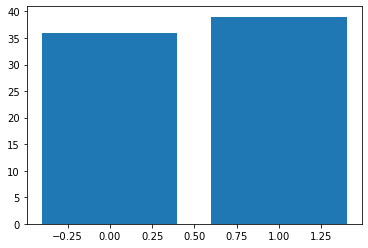

In [9]:
plt.bar(df.result,df.teamkills)

In [10]:
df.corr()['result'].sort_values() #Worth exploring gspd, barons, dragons, damagetochampions, firstblood, wardskilled

opp_towers             -8.928289e-01
opp_inhibitors         -7.616441e-01
teamdeaths             -7.040007e-01
opp_barons             -6.400607e-01
damagetakenperminute   -2.321933e-01
gamelength              4.882873e-17
game                    2.081712e-16
controlwardsbought      8.245991e-04
blue_side               4.587156e-02
wardsplaced             5.309540e-02
wardskilled             1.356691e-01
firstblood              2.327788e-01
damagetochampions       3.041868e-01
totalgold               4.408372e-01
dragons                 5.962158e-01
barons                  6.400607e-01
teamkills               7.050389e-01
gspd                    7.550345e-01
inhibitors              7.616441e-01
towers                  8.928289e-01
result                  1.000000e+00
Name: result, dtype: float64

In [11]:
def plot_cols(df):
    columns = ['blue_side', 'firstblood' ,'gspd', 'barons', 'dragons', 'damagetochampions','wardsplaced', 'wardskilled']

    plt.figure(figsize = (10,20))
    count = 1
    for col in columns:
        plt.subplot(4,2,count)
        plt.title(col)
        sns.barplot(data=df,x='result',y=col)
        count+=1
    plt.tight_layout()
    plt.show()

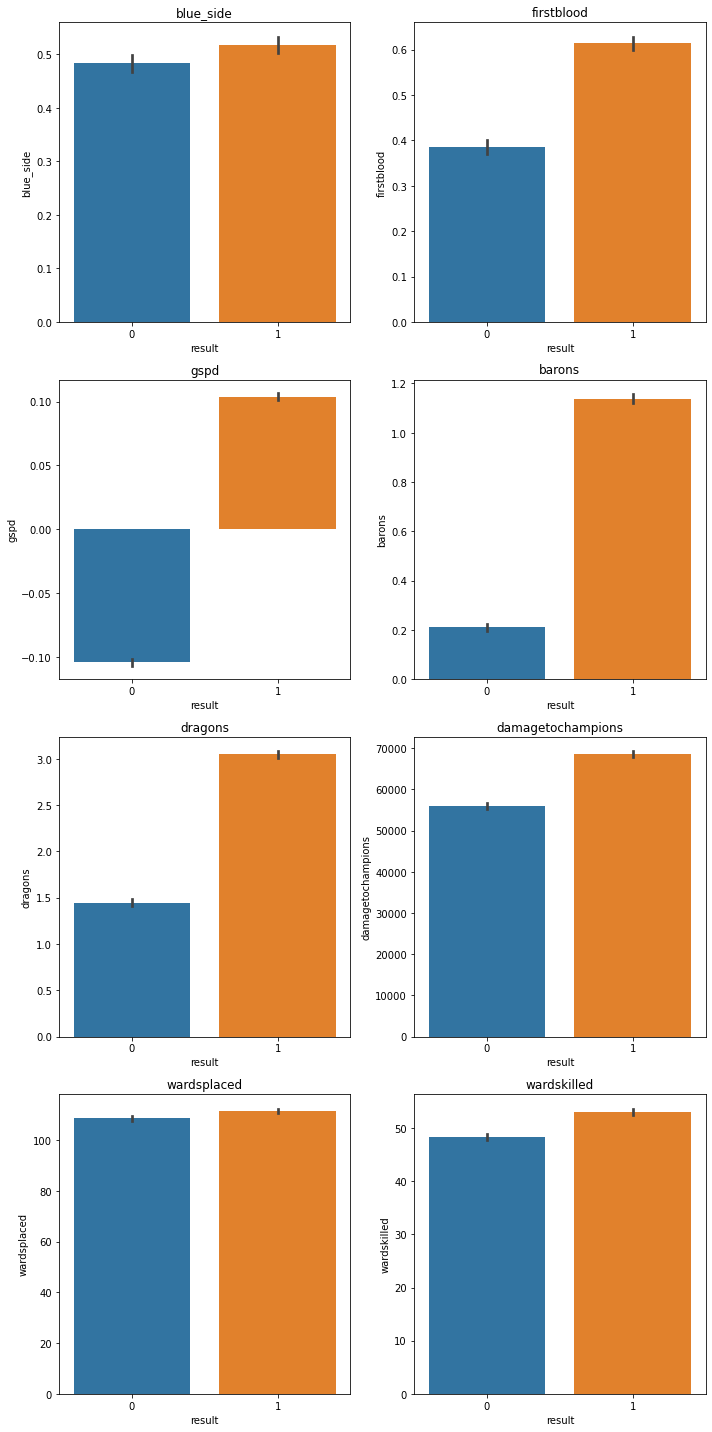

In [12]:
plot_cols(train)

In [13]:
columns = ['blue_side', 'firstblood' ,'gspd', 'barons', 'dragons', 'damagetochampions','wardsplaced', 'wardskilled']

In [14]:
from scipy.stats import ttest_ind

In [15]:
def get_tstat(train):  
    ind=0
    temp_list = []
    for col in columns:
        t,p= ttest_ind(train[col],train.result, equal_var=False)
        temp = pd.DataFrame({'column':col,'t_stat':t,'p_value':p},index=[ind])
        ind+=1
        temp_list.append(temp)
    tstat = pd.concat(temp_list)
    tstat.p_value = tstat.p_value.round(decimals=2)
    return tstat

In [16]:
tstat = get_tstat(train)
tstat

,column,t_stat,p_value
0,blue_side,0.016098,0.99
1,firstblood,-0.048293,0.96
2,gspd,-84.683710,0.00
3,barons,17.410022,0.00
4,dragons,104.401655,0.00
5,damagetochampions,257.475200,0.00
6,wardsplaced,319.204433,0.00
7,wardskilled,243.744289,0.00


In [17]:
t,p= ttest_ind(train.blue_side,train.result, equal_var=False)
print(f'T-Statistic:{round(t,2)}  P-Value:{round(p,2)}')

T-Statistic:0.02  P-Value:0.99


In [18]:
def create_target(groupby):
    groupby['target']=groupby['result'].shift(-1)
    return groupby

In [19]:
def add_target(df):
    df = df.groupby('teamname').apply(create_target)
    df.loc[pd.isnull(df.target),'target'] =2
    df.target = df.target.astype(int,errors='ignore')
    return df

In [20]:
df = add_target(df)

In [21]:
def add_opp_name(df): #tup = list of tuples
    # Create an 'opp_name' column for each row
    evens = range(0,df.shape[0],2)
    odds = range(1,df.shape[0],2)
    tup = [(a,b) for a,b in zip(evens,odds)] # list of tuples
    
    for t in tup: #iterate through list of tuples
        a,b= t #unpack each tuple into two values
        df.loc[a,'opp_name']=df.teamname.loc[b] #create new column w/opp_name
        df.loc[b,'opp_name']=df.teamname.loc[a]
        
    return df

In [22]:
df = add_opp_name(df) #adds opponents' name

In [23]:
from sklearn.preprocessing import MinMaxScaler #scale all numerical columns

removed_columns = ['teamname','league','date','target','opp_name']
selected_columns = df.columns[~df.columns.isin(removed_columns)]

scaler = MinMaxScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])


In [38]:
# Create rolling averages for columns, concat as new columns to df


def rolling(team):
    rolling = team.rolling(10).mean()
    return rolling

def add_rolling(df):
    cols = ['gamelength','teamkills','teamdeaths','firstblood','dragons','barons','opp_barons','towers','opp_towers',\
       'inhibitors','opp_inhibitors','damagetochampions','damagetakenperminute','wardsplaced','wardskilled',\
       'controlwardsbought','totalgold','gspd']

    df_rolling=df[list(cols)+['teamname']]
    
    
    df_rolling = df_rolling.groupby('teamname',group_keys=False)[cols].apply(rolling)

    rolling_cols = [f'{col}_rolling' for col in df_rolling.columns]
    df_rolling.columns = rolling_cols
    df = pd.concat([df,df_rolling],axis=1)
    return df.dropna()

In [39]:
add_rolling(df)

,teamname,league,date,blue_side,gamelength,game,result,teamkills,teamdeaths,firstblood,dragons,barons,opp_barons,towers,opp_towers,inhibitors,opp_inhibitors,damagetochampions,damagetakenperminute,wardsplaced,wardskilled,controlwardsbought,totalgold,gspd,target,opp_name,gamelength_rolling,teamkills_rolling,teamdeaths_rolling,firstblood_rolling,dragons_rolling,barons_rolling,opp_barons_rolling,towers_rolling,opp_towers_rolling,inhibitors_rolling,opp_inhibitors_rolling,damagetochampions_rolling,damagetakenperminute_rolling,wardsplaced_rolling,wardskilled_rolling,controlwardsbought_rolling,totalgold_rolling,gspd_rolling,next_opp,next_blue,next_date,gamelength_rolling,teamkills_rolling,teamdeaths_rolling,firstblood_rolling,dragons_rolling,barons_rolling,opp_barons_rolling,towers_rolling,opp_towers_rolling,inhibitors_rolling,opp_inhibitors_rolling,damagetochampions_rolling,damagetakenperminute_rolling,wardsplaced_rolling,wardskilled_rolling,controlwardsbought_rolling,totalgold_rolling,gspd_rolling
674,T1,LCK,2021-02-03 09:47:51,1.0,0.254939,0.50,1.0,0.333333,0.102564,1.0,0.333333,0.25,0.00,0.818182,0.181818,0.142857,0.000000,0.143463,0.328507,0.325153,0.235955,0.353535,0.324083,0.607636,1,Nongshim RedForce,0.326717,0.323077,0.338462,0.5,0.516667,0.200,0.175,0.609091,0.518182,0.185714,0.128571,0.225757,0.385526,0.402761,0.312921,0.422222,0.394655,0.531254,Fredit BRION,1,2021-02-06 06:38:23,0.326717,0.323077,0.338462,0.5,0.516667,0.200,0.175,0.609091,0.518182,0.185714,0.128571,0.225757,0.385526,0.402761,0.312921,0.422222,0.394655,0.531254
684,DRX,LCK,2021-02-03 12:48:31,1.0,0.305425,0.25,0.0,0.102564,0.307692,0.0,0.333333,0.00,0.25,0.272727,0.727273,0.000000,0.142857,0.177425,0.417646,0.365031,0.348315,0.424242,0.306833,0.412176,1,Gen.G,0.304265,0.238462,0.294872,0.4,0.316667,0.225,0.150,0.554545,0.554545,0.157143,0.100000,0.202762,0.350443,0.391104,0.339888,0.360606,0.363351,0.476238,Gen.G,0,2021-02-03 13:50:53,0.304265,0.238462,0.294872,0.4,0.316667,0.225,0.150,0.554545,0.554545,0.157143,0.100000,0.202762,0.350443,0.391104,0.339888,0.360606,0.363351,0.476238
688,DRX,LCK,2021-02-03 13:50:53,0.0,0.289119,0.50,1.0,0.230769,0.076923,0.0,0.833333,0.50,0.00,0.818182,0.454545,0.142857,0.000000,0.114001,0.131462,0.374233,0.325843,0.464646,0.392374,0.591547,0,Gen.G,0.304453,0.220513,0.294872,0.3,0.383333,0.225,0.150,0.536364,0.572727,0.128571,0.100000,0.189335,0.339112,0.385276,0.342135,0.381818,0.359398,0.466154,DWG KIA,0,2021-02-07 09:37:34,0.304453,0.220513,0.294872,0.3,0.383333,0.225,0.150,0.536364,0.572727,0.128571,0.100000,0.189335,0.339112,0.385276,0.342135,0.381818,0.359398,0.466154
696,Hanwha Life Esports,LCK,2021-02-04 09:38:48,1.0,0.140169,0.50,1.0,0.538462,0.102564,0.0,0.000000,0.25,0.00,0.818182,0.000000,0.142857,0.000000,0.190931,0.417996,0.263804,0.219101,0.353535,0.283263,0.691895,0,Kwangdong Freecs,0.271841,0.392308,0.248718,0.3,0.400000,0.200,0.200,0.627273,0.381818,0.114286,0.071429,0.195626,0.381531,0.340184,0.330899,0.396970,0.359906,0.568112,Liiv SANDBOX,1,2021-02-07 05:24:15,0.271841,0.392308,0.248718,0.3,0.400000,0.200,0.200,0.627273,0.381818,0.114286,0.071429,0.195626,0.381531,0.340184,0.330899,0.396970,0.359906,0.568112
716,Gen.G,LCK,2021-02-05 09:47:06,1.0,0.123550,0.00,1.0,0.743590,0.102564,1.0,0.166667,0.25,0.00,0.818182,0.000000,0.285714,0.000000,0.263403,0.359074,0.205521,0.123596,0.282828,0.300689,0.868695,1,Nongshim RedForce,0.297617,0.302564,0.266667,0.9,0.300000,0.125,0.200,0.554545,0.581818,0.100000,0.185714,0.200715,0.345604,0.408896,0.309551,0.435354,0.358384,0.546301,Nongshim RedForce,0,2021-02-05 11:12:13,0.297617,0.302564,0.266667,0.9,0.300000,0.125,0.200,0.554545,0.581818,0.100000,0.185714,0.200715,0.345604,0.408896,0.309551,0.435354,0.358384,0.546301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [40]:
def next_opp(team):
    team['next_opp'] = team['opp_name'].shift(-1)
    return team
def add_opp(df):
    df = df.groupby('teamname').apply(next_opp)
    df.loc[df.next_opp.isnull(),'next_opp'] = 2
    return df

In [41]:
add_opp(df)

,teamname,league,date,blue_side,gamelength,game,result,teamkills,teamdeaths,firstblood,dragons,barons,opp_barons,towers,opp_towers,inhibitors,opp_inhibitors,damagetochampions,damagetakenperminute,wardsplaced,wardskilled,controlwardsbought,totalgold,gspd,target,opp_name,gamelength_rolling,teamkills_rolling,teamdeaths_rolling,firstblood_rolling,dragons_rolling,barons_rolling,opp_barons_rolling,towers_rolling,opp_towers_rolling,inhibitors_rolling,opp_inhibitors_rolling,damagetochampions_rolling,damagetakenperminute_rolling,wardsplaced_rolling,wardskilled_rolling,controlwardsbought_rolling,totalgold_rolling,gspd_rolling,next_opp,next_blue,next_date
214,eStar,LPL,2021-01-20 10:10:00,0.0,0.118219,0.25,0.0,0.205128,0.538462,0.0,0.166667,0.00,0.25,0.000000,0.909091,0.000000,0.285714,0.094946,0.559199,0.187117,0.084270,0.232323,0.118607,0.283564,0,Invictus Gaming,0.257134,0.333333,0.320513,0.6,0.350000,0.075,0.225,0.509091,0.536364,0.114286,0.171429,0.170903,0.336492,0.360429,0.226966,0.373737,0.313377,0.488379,FunPlus Phoenix,1,2021-01-27 09:18:55
233,Team WE,LPL,2021-01-21 10:09:38,0.0,0.151458,0.25,1.0,0.589744,0.128205,1.0,0.666667,0.25,0.00,0.909091,0.000000,0.285714,0.000000,0.265566,0.483687,0.239264,0.168539,0.161616,0.318706,0.753587,1,ThunderTalk Gaming,0.238194,0.405128,0.253846,0.4,0.400000,0.250,0.050,0.709091,0.263636,0.171429,0.057143,0.176869,0.351808,0.309509,0.221910,0.317172,0.334881,0.602098,LNG Esports,1,2021-01-24 11:10:43
238,Oh My God,LPL,2021-01-21 12:09:00,0.0,0.295390,0.25,0.0,0.205128,0.256410,1.0,0.333333,0.00,0.50,0.181818,0.727273,0.000000,0.142857,0.161270,0.294997,0.401840,0.241573,0.373737,0.306045,0.420045,0,Royal Never Give Up,0.285011,0.274359,0.394872,0.6,0.366667,0.150,0.175,0.363636,0.672727,0.057143,0.157143,0.184501,0.425375,0.334356,0.215169,0.309091,0.318339,0.434871,Suning,1,2021-01-28 11:13:35
252,Bilibili Gaming,LPL,2021-01-22 10:22:00,1.0,0.429602,0.25,1.0,0.564103,0.333333,1.0,0.666667,0.25,0.25,0.818182,0.272727,0.285714,0.000000,0.399437,0.583936,0.444785,0.432584,0.484848,0.526081,0.506108,0,Rare Atom,0.352368,0.407692,0.382051,0.9,0.466667,0.225,0.175,0.654545,0.563636,0.214286,0.128571,0.270558,0.415303,0.353374,0.298876,0.376768,0.429514,0.532508,LNG Esports,0,2021-01-26 11:58:28
254,DRX,LCK,2021-01-22 10:43:49,1.0,0.287237,0.00,1.0,0.410256,0.076923,1.0,0.166667,0.50,0.00,1.000000,0.272727,0.428571,0.000000,0.248271,0.244780,0.432515,0.303371,0.252525,0.431906,0.692395,0,Liiv SANDBOX,0.307495,0.310256,0.289744,0.6,0.316667,0.175,0.125,0.654545,0.518182,0.185714,0.071429,0.208992,0.353345,0.404908,0.262921,0.338384,0.368193,0.491100,Liiv SANDBOX,0,2021-01-22 12:22:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12857,DRX,LCK,2023-02-15 08:57:15,0.0,0.271558,0.25,0.0,0.179487,0.461538,0.0,0.166667,0.00,0.50,0.272727,1.000000,0.000000,0.428571,0.215048,0.470594,0.000000,0.303371,0.404040,0.284052,0.335305,2,KT Rolster,0.241518,0.210256,0.348718,0.1,0.250000,0.075,0.225,0.300000,0.727273,0.071429,0.200000,0.208102,0.490160,0.238037,0.271348,0.372727,0.260766,0.388066,2,2,2
12858,Nongshim RedForce,LCK,2023-02-15 10:37:15,1.0,0.405143,0.00,0.0,0.282051,0.333333,0.0,0.166667,0.00,0.25,0.363636,1.000000,0.000000,0.428571,0.269260,0.506997,0.000000,0.297753,0.606061,0.412882,0.407563,0,Hanwha Life Esports,0.262966,0.197436,0.325641,0.2,0.166667,0.075,0.225,0.272727,0.809091,0.028571,0.242857,0.180763,0.489022,0.258896,0.230337,0.388889,0.279500,0.392446,Hanwha Life Esports,1,2023-02-15 11:39:14
12859,Hanwha Life Esports,LCK,2023-02-15 10:37:15,0.0,0.405143,0.00,1.0,0.333333,0.282051,1.0,0.666667,0.25,0.00,1.000000,0.363636,0.428571,0.000000,0.355483,0.411752,0.000000,0.460674,0.595960,0.509133,0.592437,1,Nongshim RedForce,0.308592,0.243590,0.217949,0.6,0.366667,0.200,0.200,0.590909,0.481818,0.171429,0.100000,0.247753,0.471949,0.324233,0.294382,0

In [27]:
def next_side(team):
    team['next_blue'] = team['blue_side'].shift(-1)
    return team

def add_next_side(df):
    df = df.groupby('teamname').apply(next_side)
    df.loc[df.next_blue.isnull(),'next_blue']=2
    df.next_blue = df.next_blue.astype(int,errors='ignore')
    return df

In [28]:
def next_date(team):
    team['next_date'] = team['date'].shift(-1)
    return team

def add_next_date(df):
    df = df.groupby('teamname').apply(next_date)
    df.loc[df.next_date.isnull(),'next_date']=2
    return df

In [29]:
df[df.next_blue==2].head()

,teamname,league,date,blue_side,gamelength,game,result,teamkills,teamdeaths,firstblood,dragons,barons,opp_barons,towers,opp_towers,inhibitors,opp_inhibitors,damagetochampions,damagetakenperminute,wardsplaced,wardskilled,controlwardsbought,totalgold,gspd,target,opp_name,gamelength_rolling,teamkills_rolling,teamdeaths_rolling,firstblood_rolling,dragons_rolling,barons_rolling,opp_barons_rolling,towers_rolling,opp_towers_rolling,inhibitors_rolling,opp_inhibitors_rolling,damagetochampions_rolling,damagetakenperminute_rolling,wardsplaced_rolling,wardskilled_rolling,controlwardsbought_rolling,totalgold_rolling,gspd_rolling,next_opp,next_blue,next_date
1994,Cruzeiro eSports,CBLOL,2021-03-14 16:48:04,1.0,0.225149,0.00,1.0,0.564103,0.128205,1.0,0.666667,0.25,0.0,0.818182,0.272727,0.142857,0.000000,0.161715,0.453547,0.288344,0.162921,0.363636,0.325245,0.572873,2,KaBuM! e-Sports,0.258984,0.271795,0.392308,0.5,0.250000,0.125,0.200,0.354545,0.681818,0.071429,0.185714,0.165762,0.408184,0.289877,0.156742,0.293939,0.278557,0.431719,2,2,2
2286,eStar,LPL,2021-03-26 10:11:22,1.0,0.303857,0.25,0.0,0.153846,0.538462,1.0,0.166667,0.00,0.5,0.545455,0.909091,0.142857,0.142857,0.212549,0.422428,0.312883,0.247191,0.373737,0.301945,0.398733,2,Suning,0.243368,0.194872,0.487179,0.7,0.116667,0.025,0.300,0.190909,0.827273,0.014286,0.200000,0.164626,0.406857,0.324540,0.212360,0.351515,0.249188,0.368197,2,2,2
2879,MGN Box Esports,VCS,2021-05-20 08:35:38,0.0,0.262151,0.50,0.0,0.230769,0.512821,0.0,0.500000,0.00,0.5,0.181818,0.818182,0.000000,0.142857,0.146595,0.245578,0.337423,0.196629,0.262626,0.278375,0.286650,2,Burst The Sky Esports,0.264691,0.333333,0.371795,0.7,0.350000,0.175,0.175,0.454545,0.572727,0.085714,0.114286,0.182015,0.372809,0.310429,0.213483,0.271717,0.326737,0.511751,2,2,2
4800,FC Schalke 04 Esports,LEC,2021-08-01 16:27:31,1.0,0.334274,0.00,0.0,0.205128,0.435897,1.0,0.333333,0.00,0.5,0.454545,1.000000,0.142857,0.714286,0.219828,0.437258,0.404908,0.314607,0.333333,0.324114,0.379343,2,Fnatic,0.253904,0.205128,0.441026,0.4,0.216667,0.075,0.275,0.345455,0.909091,0.042857,0.357143,0.174494,0.395728,0.314417,0.183146,0.332323,0.268470,0.405871,2,2,2
4927,Rogue Warriors,LPL,2021-08-06 12:07:20,0.0,0.245218,0.25,1.0,0.589744,0.256410,1.0,0.333333,0.50,0.0,0.636364,0.454545,0.142857,0.000000,0.236528,0.341434,0.248466,0.269663,0.242424,0.376910,0.488423,2,JD Gaming,0.284133,0.379487,0.348718,0.5,0.383333,0.150,0.175,0.481818,0.581818,0.100000,0.157143,0.235673,0.452990,0.309509,0.237640,0.335354,0.347235,0.463979,2,2,2


In [30]:
full = df.merge(df[rolling_cols + ["next_opp", "next_date", "teamname"]], left_on=["teamname", "next_date"], \
                right_on=["next_opp", "next_date"])

In [31]:
full.next_blue.value_counts()

1    5631
0    5631
Name: next_blue, dtype: int64

<AxesSubplot:xlabel='result', ylabel='blue_side'>

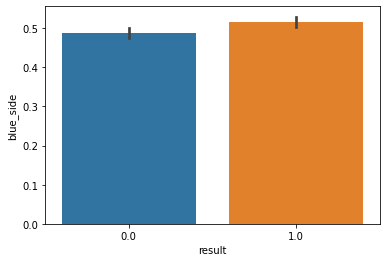

In [32]:
sns.barplot(data = full, x='result',y='blue_side')

In [33]:
len(df[(df.blue_side==1) & (df.result == 1)])/(df.shape[0]/2) #Establishes a baseline - blue team wins 52% of time

0.5191946766763351

In [34]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier

def create_objects():
    rr = RidgeClassifier(solver ='sag',normalize=False,)
    split = TimeSeriesSplit(n_splits=3)
    sfs = SequentialFeatureSelector(rr, n_features_to_select=14,direction='backward',cv=split,n_jobs=-1)

create_objects()

In [35]:
removed_columns = list(full.columns[full.dtypes=='object']) + removed_columns
selected_columns = full.columns[~full.columns.isin(removed_columns)]

In [ ]:
sfs.fit(full[selected_columns],full['target'])

In [ ]:
selectors = selected_columns[sfs.get_support()]

In [ ]:
predictions = backtest(full,rr,selectors,'target')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions.actual,predictions.prediction)

.5665 'forward', rr

In [ ]:
def near_split(x, num_bins): #Split my df into equal splits to perform backtesting
    quotient, remainder = divmod(x, num_bins)
    bins = [quotient + 1] * remainder + [quotient] * (num_bins - remainder)
    count = 0
    new_list = []
    for b in bins:
        count += b
        new_list.append(count)
    return new_list

splits = near_split(df.shape[0],5)
last_split = splits[4]-splits[3] #Difference between last two values for final 'test' set

In [ ]:
def backtest(data,model,predictors,target):
    all_predictions= []
    
    for i in range(0,len(splits)-1):
        train = data.loc[:splits[i]]
        test = data.loc[splits[i]:splits[i]+last_split]
        
        model.fit(train[predictors],train[target])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds,index=test.index)
        combined = pd.concat([test[target],preds],axis=1)
        combined.columns = ['actual','prediction']
        
        all_predictions.append(combined)
        
    return pd.concat(all_predictions)
        
        
        
        


In [ ]:
predictions = backtest(full,rr,selectors,'target')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions.actual,predictions.prediction)

### optimize ridge regression

In [ ]:
from sklearn import decomposition
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
X = full[selectors]
y = full['target']

In [ ]:
pca = decomposition.PCA()
ridge = linear_model.Ridge()

In [ ]:
pipe = Pipeline(steps=[("pca", pca),
                        ("ridge", ridge)])

In [ ]:
n_components = list(range(1,X.shape[1]+1,1))
normalize = [True, False]
solver = ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
parameters = dict(pca__n_components=n_components,
                      ridge__normalize=normalize,
                      ridge__solver=solver)

In [ ]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

In [ ]:
clf_GS.best_params_

In [ ]:
print("Best Number Of Components:", clf_GS.best_estimator_.get_params()["pca__n_components"])
print(); print(clf_GS.best_estimator_.get_params()["ridge"])



In [42]:
df.shape

(11722, 47)

In [44]:
df.tail()

,teamname,league,date,blue_side,gamelength,game,result,teamkills,teamdeaths,firstblood,dragons,barons,opp_barons,towers,opp_towers,inhibitors,opp_inhibitors,damagetochampions,damagetakenperminute,wardsplaced,wardskilled,controlwardsbought,totalgold,gspd,target,opp_name,gamelength_rolling,teamkills_rolling,teamdeaths_rolling,firstblood_rolling,dragons_rolling,barons_rolling,opp_barons_rolling,towers_rolling,opp_towers_rolling,inhibitors_rolling,opp_inhibitors_rolling,damagetochampions_rolling,damagetakenperminute_rolling,wardsplaced_rolling,wardskilled_rolling,controlwardsbought_rolling,totalgold_rolling,gspd_rolling,next_opp,next_blue,next_date
12857,DRX,LCK,2023-02-15 08:57:15,0.0,0.271558,0.25,0.0,0.179487,0.461538,0.0,0.166667,0.00,0.50,0.272727,1.000000,0.000000,0.428571,0.215048,0.470594,0.0,0.303371,0.404040,0.284052,0.335305,2,KT Rolster,0.241518,0.210256,0.348718,0.1,0.250000,0.075,0.225,0.300000,0.727273,0.071429,0.200000,0.208102,0.490160,0.238037,0.271348,0.372727,0.260766,0.388066,2,2,2
12858,Nongshim RedForce,LCK,2023-02-15 10:37:15,1.0,0.405143,0.00,0.0,0.282051,0.333333,0.0,0.166667,0.00,0.25,0.363636,1.000000,0.000000,0.428571,0.269260,0.506997,0.0,0.297753,0.606061,0.412882,0.407563,0,Hanwha Life Esports,0.262966,0.197436,0.325641,0.2,0.166667,0.075,0.225,0.272727,0.809091,0.028571,0.242857,0.180763,0.489022,0.258896,0.230337,0.388889,0.279500,0.392446,Hanwha Life Esports,1,2023-02-15 11:39:14
12859,Hanwha Life Esports,LCK,2023-02-15 10:37:15,0.0,0.405143,0.00,1.0,0.333333,0.282051,1.0,0.666667,0.25,0.00,1.000000,0.363636,0.428571,0.000000,0.355483,0.411752,0.0,0.460674,0.595960,0.509133,0.592437,1,Nongshim RedForce,0.308592,0.243590,0.217949,0.6,0.366667,0.200,0.200,0.590909,0.481818,0.171429,0.100000,0.247753,0.471949,0.324233,0.294382,0.409091,0.369562,0.537296,Nongshim RedForce,0,2023-02-15 11:39:14
12860,Nongshim RedForce,LCK,2023-02-15 11:39:14,1.0,0.333020,0.25,0.0,0.153846,0.333333,0.0,0.500000,0.25,0.00,0.090909,0.909091,0.000000,0.142857,0.228105,0.375239,0.0,0.308989,0.626263,0.332468,0.432481,2,Hanwha Life Esports,0.268799,0.207692,0.343590,0.2,0.200000,0.100,0.175,0.263636,0.800000,0.028571,0.214286,0.192262,0.486717,0.230061,0.236517,0.413131,0.285761,0.396095,2,2,2
12861,Hanwha Life Esports,LCK,2023-02-15 11:39:14,0.0,0.333020,0.25,1.0,0.333333,0.153846,1.0,0.333333,0.00,0.25,0.909091,0.090909,0.142857,0.000000,0.267787,0.429495,0.0,0.550562,0.434343,0.439794,0.567519,2,Nongshim RedForce,0.321511,0.248718,0.228205,0.7,0.333333,0.175,0.225,0.600000,0.481818,0.157143,0.100000,0.255804,0.473826,0.293865,0.331461,0.418182,0.381713,0.529285,2,2,2
